## Table of Content  
1. [Data Cleaning](#1-Data-Cleaning)  
   1.1 [Import Dependencies](#1.1-Import-Dependencies)  
   1.2 [Dataset Attributes](#1.2-Dataset-Attributes)  
   1.3 [Standardize Categorical Values](#1.3-Standardize-Categorical-Values)  
   1.4 [Inspecting Missing Values](#1.4-Inspecting-Missing-Values)  
   1.5 [Replacing the Missing Values](#1.5-Replacing-the-Missing-Values)  
   1.6 [Categorizing the data in different types](#1.6-Categories)  
   1.7 [Duplicate Check in Dataset](#1.7-Duplicate-check)  
   1.8 [Outlier Detection](#1.8-Outlier-Detection)  
   1.9 [Treatment of Outliers](#1.9-Treatment-of-Outliers)  
   

#### 1. Data Cleaning  
##### 1.1 Import Dependencies and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.utils import resample # For bootstrapping


df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=r",")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#df.describe()

In [3]:
# id column is removed as its unique and it won't matter for the output
df.drop(columns = ['id'],inplace = True)

#### 1.2 Dataset Attributes

In [4]:
df.shape

(5110, 11)

There are 5110 rows and 12 columns

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.dtypes
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['bmi'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1
 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8
 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1 26.7
 38.7 34.9 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7
 34.2 23.6 22.3 37.1 45.  25.5 30.8 37.4 34.5 27.9 29.5 46.  42.5 35.5
 26.9 45.5 31.5 33.  23.4 30.7 20.5 21.5 40.  28.6 42.2 29.6 35.4 16.9
 26.8 39.3 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18.  17.6 19.1 50.1
 17.7 54.6 35.  22.  39.4 19.7 22.5 25.2 41.8 60.9 23.7 24.5 31.2 16.
 31.6 25.1 24.8 18.3 20.  19.5 36.  35.3 40.

There are different types of data types in the dataset and some are **Binary**, **Categorical**, **Continues**

#### 1.3 Standardize Categorical Values  

Converting categorical values into continuous values by assigning them values from 1 to 5 

In [7]:
pd.set_option('future.no_silent_downcasting', True)
df['gender'] = df['gender'].replace({'Female':0, 'Male':1, 'Other': 0}).astype('int64')
df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype('int64')
df['work_type'] = df['work_type'].replace({'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4, 'Never_worked':5}).astype('int64')
df['Residence_type'] = df['Residence_type'].replace({'Urban':0, 'Rural':1}).astype('int64')
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked':1, 'never smoked':2, 'smokes':3, 'Unknown':4}).astype('int64')
#df['bmi'] = df['bmi'].fillna(0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,0,228.69,36.6,1,1
1,0,61.0,0,0,1,2,1,202.21,NaN,2,1
2,1,80.0,0,1,1,1,1,105.92,32.5,2,1
3,0,49.0,0,0,1,1,0,171.23,34.4,3,1
4,0,79.0,1,0,1,2,1,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,0,83.75,NaN,2,0
5106,0,81.0,0,0,1,2,0,125.20,40.0,2,0
5107,0,35.0,0,0,1,2,1,82.99,30.6,2,0
5108,1,51.0,0,0,1,1,1,166.29,25.6,1,0


#### 1.4 Inspecting Missing Values  
As we can see there are multiple missing values in the bmi section as seen above

In [8]:
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))

True
False


In [9]:
l1 = [i for i in range(len(df.isnull()['bmi'])) if df.isnull().loc[i, 'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

Total Number of Missing Values in bmi feature : 201


#### 1.5 Replacing the Missing Values  
*As seen in the describe table, the mean and median of bmi are very close to each other*  
*So replacing the missing values with mean values*

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [11]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,1.837965,0.491977,106.147677,28.893237,2.585519,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.698018,1.092522,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.300000,1.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.245000,23.800000,2.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,4.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,4.000000,1.000000


#### 1.6 Categorizing the data in different types
- **Categorical Features:** gender, ever_married, work_type, Residence_type, smoking_status
- **Binary Numerical Features:** hypertension,heart_disease, stroke
- **Continous Numerical Features:** age, avg_glucose_level, bmi

We can move gender, ever_married and Residence_type to Binary Numerical like this  
- **Categorical Features:** work_type, smoking_status  
- **Binary Numerical Features:** hypertension,heart_disease, stroke, gender, ever_married, Residence_type
- **Continous Numerical Features:** age, avg_glucose_level, bmi

#### 1.7 Duplicate Check in Dataset  

In [12]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


There are no duplicates rows in the dataset 

#### 1.8 Outlier Detection

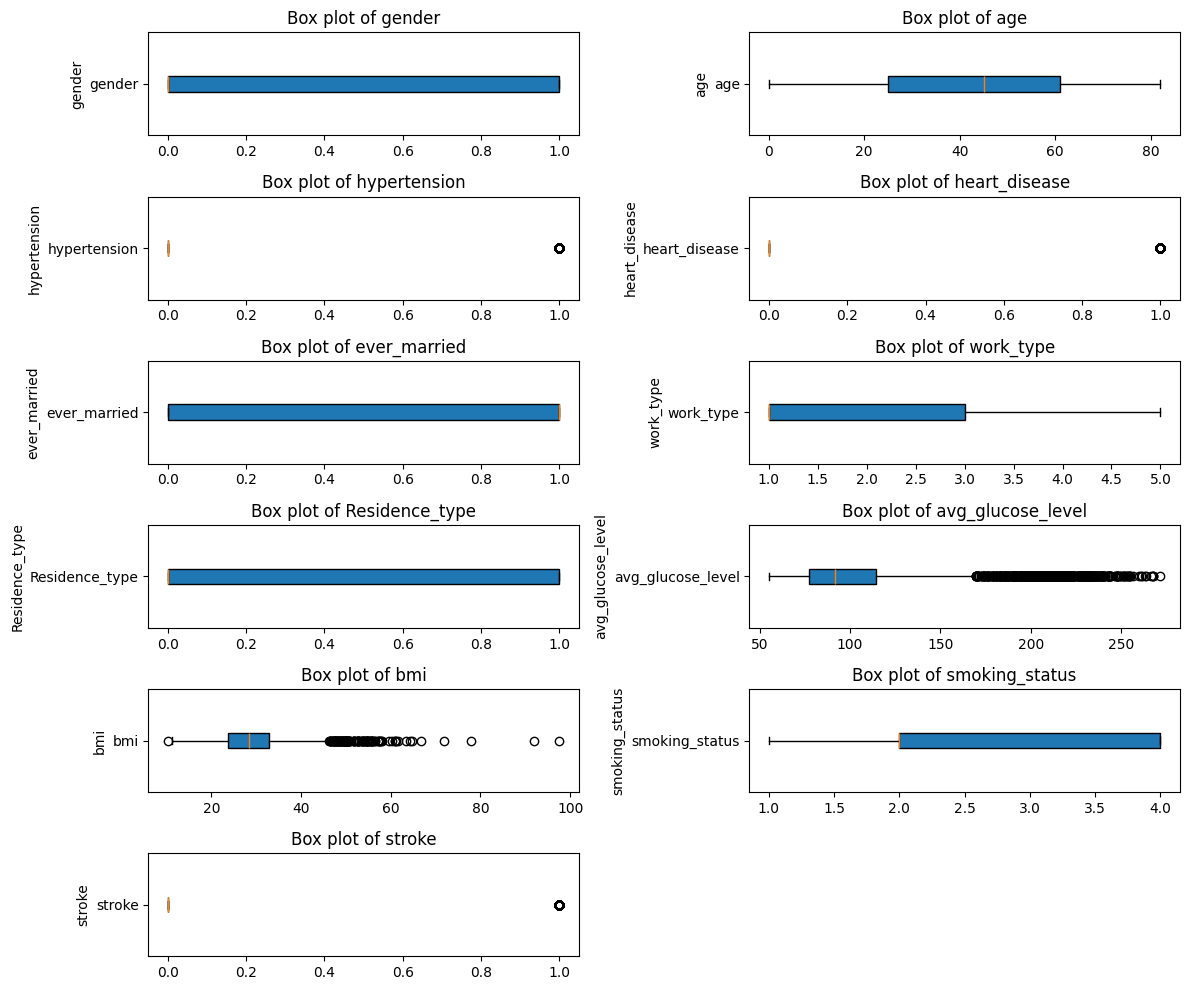

In [13]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

n_o_plots = len(df.columns)
n_o_cols = 2
n_o_rows = int(math.ceil(n_o_plots / n_o_cols))
gs = gridspec.GridSpec(n_o_rows, n_o_cols)
fig = plt.figure(figsize=(12, 10))

for i in range(n_o_plots):
    ax = fig.add_subplot(gs[i])
    column = df.columns[i]
    data = pd.to_numeric(df[column], errors='coerce').dropna()
    ax.boxplot(data, patch_artist=True, tick_labels=[column], vert=False)
    ax.set_title(f"Box plot of {column}")
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()



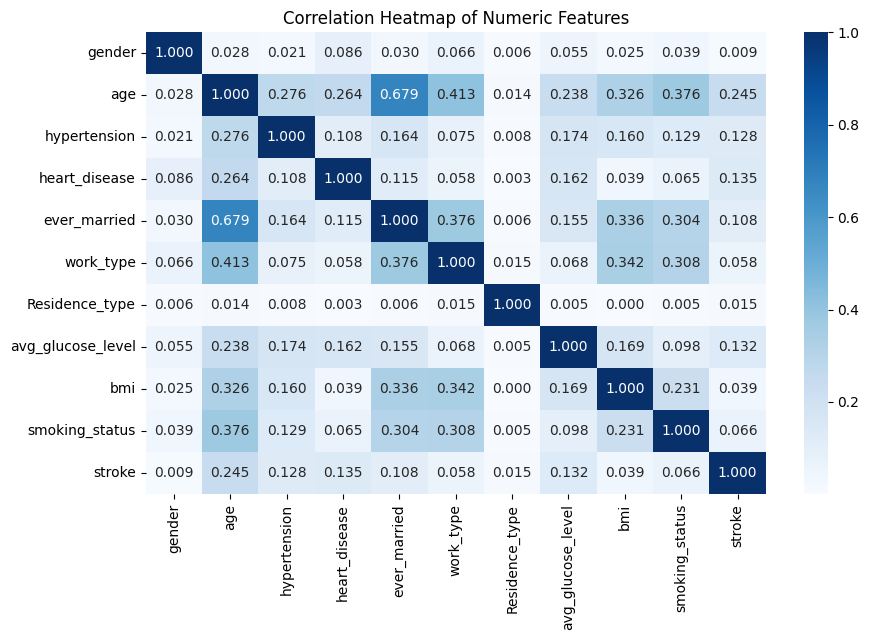

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap of the absolute correlation matrix
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(abs(numeric_df.corr()), annot=True, fmt='.3f', cmap='Blues')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


**Key Observations**  
- Highly Correlated Pairs
  - age and ever_married 0.679: Older individuals are more likely to be married
  - work_type and ever_married 0.578: Possibly due to age/work role influencing marital status
- Low to Moderate Correlation
  - age 0.245: moderate positive correlation, as age increases stroke likelihood slightly increases
  - hypertension 0.131
  - heart_disease 0.134
  - avg_glucose_level 0.131: slight correlation, hinting at diabetes being a risk factor    
- Others are very weak to find correlations  
  - Either they don't impact the stroke strongly or need more information to find correlation  

In [15]:
# = df.groupby(['stroke'])['stroke'].count()
stroke_counts = df['stroke'].value_counts()

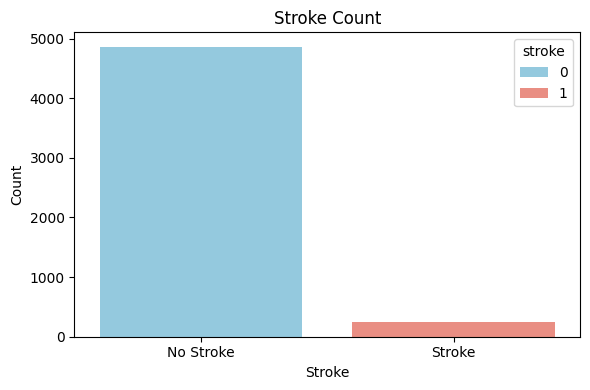

In [16]:
# plt.figure(figsize=(6, 4))
# stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# plt.title('Stroke Count')
# plt.xlabel('Stroke')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    x=stroke_counts.index,
    y=stroke_counts.values,
    ax=ax,
    hue=stroke_counts.index,
    palette=['skyblue', 'salmon']
)
ax.set(
    title='Stroke Count',
    xlabel='Stroke',
    ylabel='Count'
)
ax.set_xticks(stroke_counts.index)
ax.set_xticklabels(['No Stroke', 'Stroke']) 


fig.tight_layout()
plt.show()

**The count of patients that have stroke to patients that don't have a stroke is very high, one can say they are highly unbalanced**

In [17]:
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


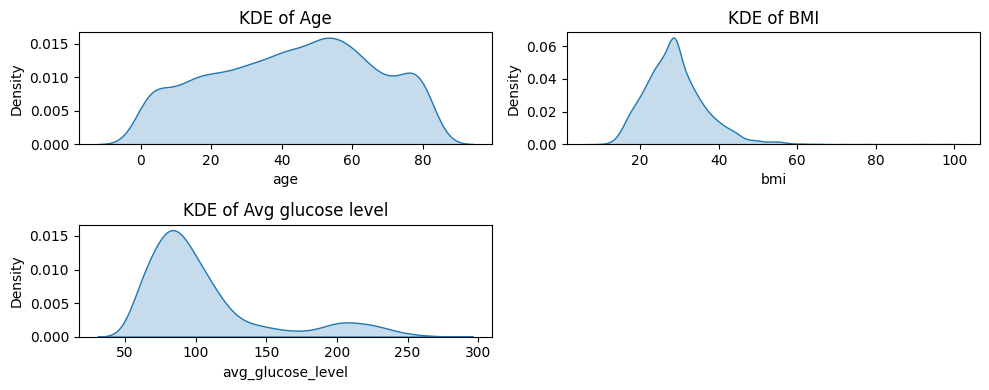

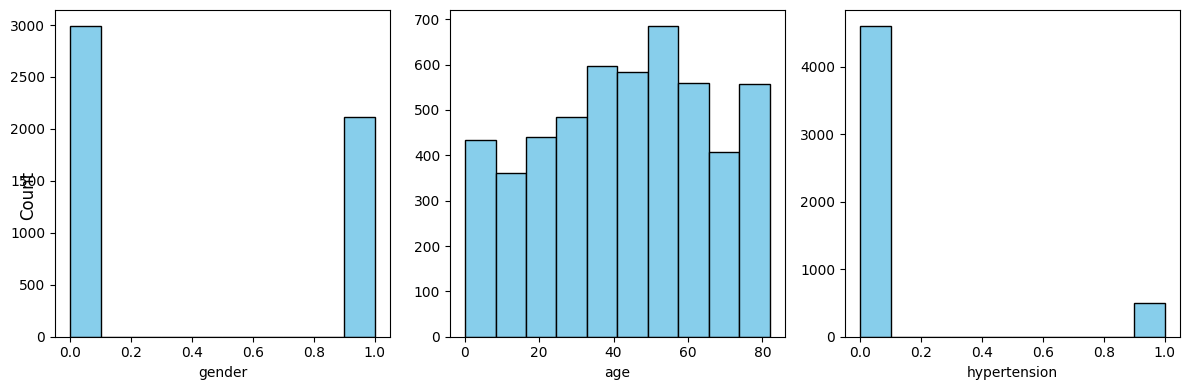

In [18]:
plt.figure(figsize=(10, 4))

# KDE for age
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='age', fill=True)
plt.title('KDE of Age')

# KDE for bmi
plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='bmi', fill=True)
plt.title('KDE of BMI')

plt.subplot(2,2,3)
sns.kdeplot(data=df, x='avg_glucose_level', fill=True)
plt.title("KDE of Avg glucose level")

plt.tight_layout()
plt.show()

import math
continuous = df[['age','bmi','avg_glucose_level']]
n_plots = len(continuous.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots/n_cols))
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(12,4))
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    ax.hist(df[df.columns[i]], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel(df.columns[i])
fig.tight_layout()
fig.supylabel('Count')
plt.show()



**KDE Inference**  
- Age: Bimodal distribution with peaks around 25-30 and 55-65, showing that the data has two age groups, younger adults and older individuals  
- BMI: Right-shewed distribution centered around 25-30 and tailing off gradually. Few high outliers beyond 50, some even close to 100
- Avg_Glucose_leve: Right-skewed distribution with values clustered around 80-150. Some high outliers in 200, indicating high glucose levels, could be due to diabetic cases

**Histogram Inference**  
- Gender: Two bars one for male and female
- Age: Left-skewed, mix of younger and older age groups with more in the older side of age group

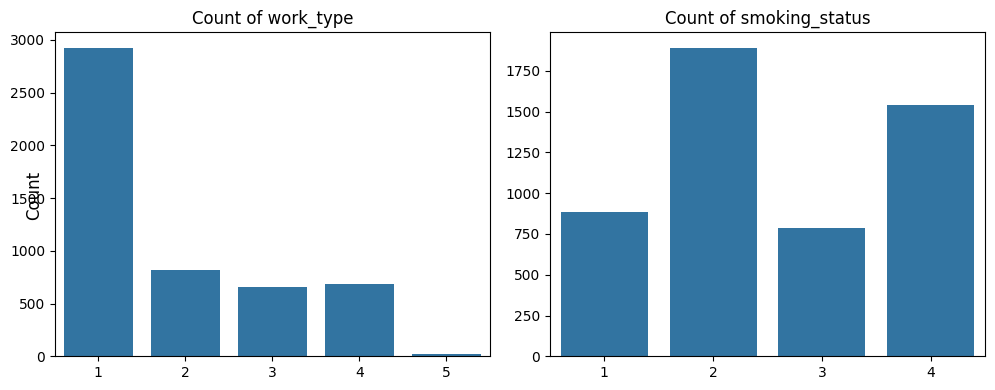

In [19]:
# Select categorical columns
category = df[['work_type', 'smoking_status']]
n_plots = len(category.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots / n_cols))

# Set up grid layout
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(15, 4))

# Plot each category using countplot
for i, col in enumerate(category.columns):
    ax = fig.add_subplot(gs[i])
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()
fig.supylabel('Count')
plt.show()

**Observations**  
- work_type: Most of the individuals fall under "private" and others are mostly evenly distributed in other work_type groups
- smoking_status: Higer number of people fall under "never smoked" and there are high number of uncertainty "unknows"

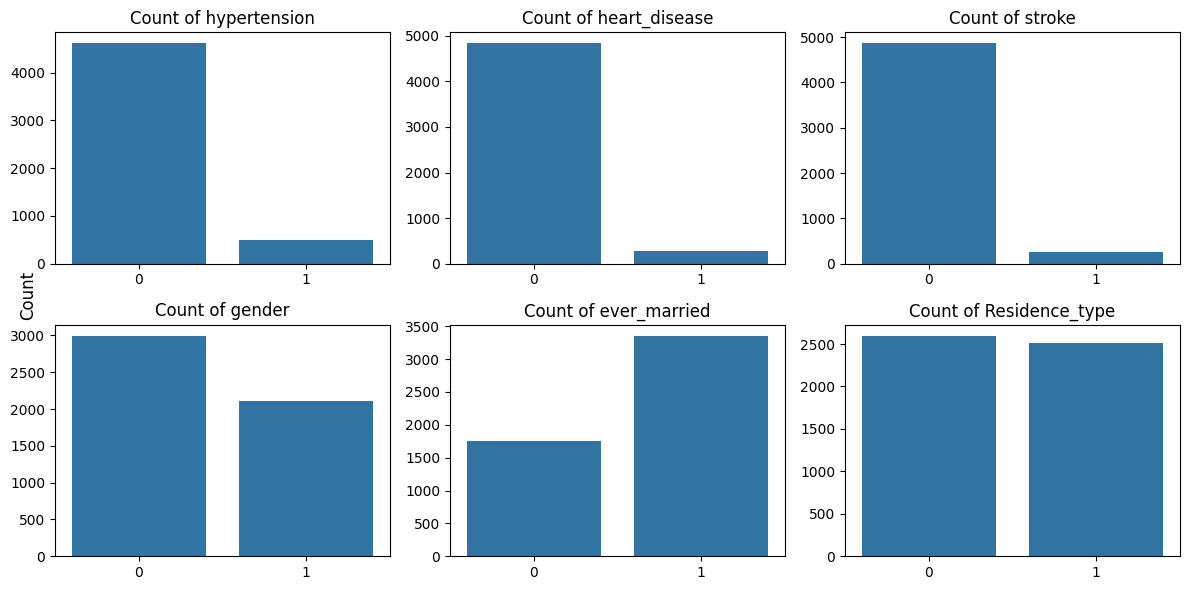

In [20]:
# Select categorical columns
category = df[['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'Residence_type']]
n_plots = len(category.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots / n_cols))

# Set up grid layout
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(12, 6))

# Plot each category using countplot
for i, col in enumerate(category.columns):
    ax = fig.add_subplot(gs[i])
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()
fig.supylabel('Count')
plt.show()



#### 1.9 Treatment of Outliers  
Using binning on bmi, avg_glucose_level and age  
- Why?
  - Easier to understand categories "young" and "old" than to just look a range of numbers
  - Reduces impact on outliers. Exterme values in bmi or glucose can skew model learning
  - Can help in neutralizing outliers influence by grouping values into broader buckets

In [21]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df.head(10)



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,1,67.0,0,1,1,1,0,228.69,36.600000,1,1,Obesity,Elderly,High
1,0,61.0,0,0,1,2,1,202.21,28.893237,2,1,Overweight,Elderly,High
2,1,80.0,0,1,1,1,1,105.92,32.500000,2,1,Obesity,Elderly,Normal
3,0,49.0,0,0,1,1,0,171.23,34.400000,3,1,Obesity,Mid Adults,High
4,0,79.0,1,0,1,2,1,174.12,24.000000,2,1,Ideal,Elderly,High
5,1,81.0,0,0,1,1,0,186.21,29.000000,1,1,Overweight,Elderly,High
6,1,74.0,1,1,1,1,1,70.09,27.400000,2,1,Overweight,Elderly,Low
7,0,69.0,0,0,0,1,0,94.39,22.800000,2,1,Ideal,Elderly,Normal
8,0,59.0,0,0,1,1,1,76.15,28.893237,4,1,Overweight,Mid Adults,Low
9,0,78.0,0,0,1,1,0,58.57,24.200000,4,1,Ideal,Elderly,Low


In [22]:
num_rows=df.shape
print(num_rows)

(5110, 14)


In [23]:
# --- 1. Sampling Distributions ---
print("--- 1. Sampling Distributions ---")
# We'll explore the sampling distribution of the mean for the 'age' column.

# Population (our dataset's 'age' column)
population_ages = df['age'].dropna() # Ensure no NaNs if any remained
population_mean_age = population_ages.mean()
population_std_age = population_ages.std()

print(f"Population (dataset 'age') mean: {population_mean_age:.2f}")
print(f"Population (dataset 'age') std dev: {population_std_age:.2f}")



--- 1. Sampling Distributions ---
Population (dataset 'age') mean: 43.23
Population (dataset 'age') std dev: 22.61


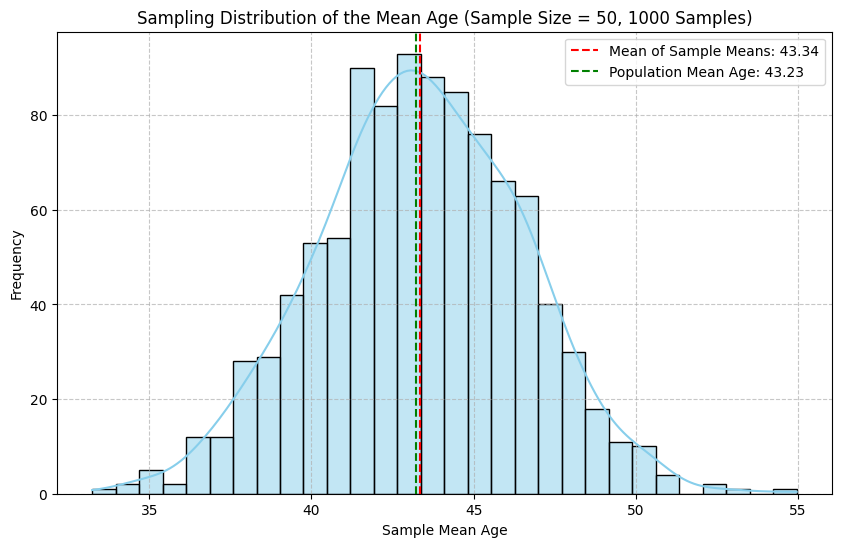

Mean of the sample means for age: 43.34
Theoretical Standard Error of the Mean (Age): 3.20
Empirical Standard Error of the Mean (Age from samples): 3.16
The distribution of sample means is the sampling distribution.
Its mean should be close to the population mean.
Its standard deviation is the standard error.

--- 2. The Central Limit Theorem (CLT) ---


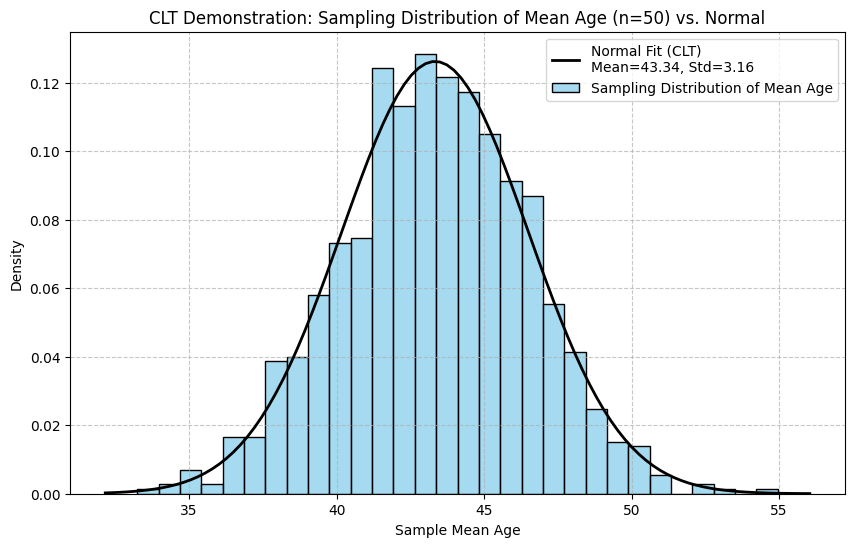

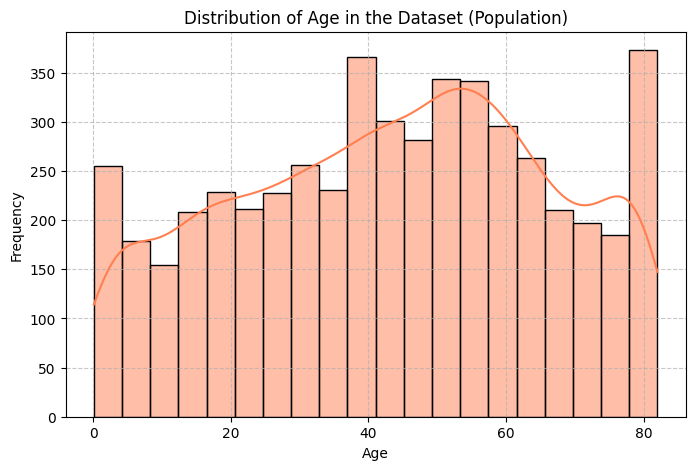

The histogram of sample means (from 'age') should approximate a normal distribution.
This is predicted by the Central Limit Theorem, even if the original 'age' distribution isn't perfectly normal.
The original 'age' distribution might not be perfectly normal (as seen above), but its sampling distribution of means tends to be.



In [24]:

# %%
# Parameters for sampling and generating sample means
sample_size_sd = 50 # Renamed to avoid conflict if sample_size used elsewhere
num_samples_sd = 1000  # Number of samples to draw

# Collect sample means
sample_means_age = []
for _ in range(num_samples_sd):
    sample = np.random.choice(population_ages, size=sample_size_sd, replace=True) # Sample with replacement
    sample_means_age.append(np.mean(sample))
# This cell prepares data for the next cell's plot

# %%
# Plot the sampling distribution of the mean
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_age, kde=True, color='skyblue', bins=30)
plt.title(f'Sampling Distribution of the Mean Age (Sample Size = {sample_size_sd}, {num_samples_sd} Samples)')
plt.xlabel('Sample Mean Age')
plt.ylabel('Frequency')
plt.axvline(np.mean(sample_means_age), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean of Sample Means: {np.mean(sample_means_age):.2f}')
plt.axvline(population_mean_age, color='green', linestyle='dashed', linewidth=1.5, label=f'Population Mean Age: {population_mean_age:.2f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# %%
# Textual summary for Sampling Distributions
print(f"Mean of the sample means for age: {np.mean(sample_means_age):.2f}")
# Standard error of the mean (theoretical vs. empirical)
theoretical_se_mean_age = population_std_age / np.sqrt(sample_size_sd)
empirical_se_mean_age = np.std(sample_means_age)
print(f"Theoretical Standard Error of the Mean (Age): {theoretical_se_mean_age:.2f}")
print(f"Empirical Standard Error of the Mean (Age from samples): {empirical_se_mean_age:.2f}")
print("The distribution of sample means is the sampling distribution.")
print("Its mean should be close to the population mean.")
print("Its standard deviation is the standard error.\n")

# %%
# --- 2. The Central Limit Theorem (CLT) ---
print("--- 2. The Central Limit Theorem (CLT) ---")
# The CLT states that the sampling distribution of the sample mean will be approximately
# normally distributed for large sample sizes, regardless of the population's distribution.
# The plot from Section 1 already demonstrates this. Let's re-emphasize with a normal curve.

# %%
# Plot Sampling Distribution vs. Normal Fit (CLT Demonstration)
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_age, kde=False, stat='density', color='skyblue', bins=30, label='Sampling Distribution of Mean Age')

# Fit a normal distribution to the sample means
mu_clt, std_clt = stats.norm.fit(sample_means_age)
xmin_clt, xmax_clt = plt.xlim() # Use xmin_clt, xmax_clt to avoid conflict
x_clt_vals = np.linspace(xmin_clt, xmax_clt, 100) # Use x_clt_vals
p_clt_vals = stats.norm.pdf(x_clt_vals, mu_clt, std_clt) # Use p_clt_vals
plt.plot(x_clt_vals, p_clt_vals, 'k', linewidth=2, label=f'Normal Fit (CLT)\nMean={mu_clt:.2f}, Std={std_clt:.2f}')

plt.title(f'CLT Demonstration: Sampling Distribution of Mean Age (n={sample_size_sd}) vs. Normal')
plt.xlabel('Sample Mean Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# %%
# Plot original distribution of age for comparison
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, color='coral')
plt.title('Distribution of Age in the Dataset (Population)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# %%
# Textual summary for CLT
print("The histogram of sample means (from 'age') should approximate a normal distribution.")
print("This is predicted by the Central Limit Theorem, even if the original 'age' distribution isn't perfectly normal.")
print("The original 'age' distribution might not be perfectly normal (as seen above), but its sampling distribution of means tends to be.\n")

# %%


In [25]:
# --- 3. Methods of Estimation ---
print("--- 3. Methods of Estimation ---")
# Point Estimates: Single values to estimate population parameters.

# Take a sample from the dataset for estimation examples
sample_df = df.sample(n=200, random_state=42)

# %%
# Point estimate for population mean age
point_estimate_mean_age_sample = sample_df['age'].mean()
print(f"Point estimate for mean age (from a sample of 200): {point_estimate_mean_age_sample:.2f}")
print(f"(Actual dataset mean age: {df['age'].mean():.2f})")

# %%
# Point estimate for population proportion of strokes
point_estimate_prop_stroke_sample = sample_df['stroke'].mean() # Mean of 0s and 1s is the proportion of 1s
print(f"Point estimate for proportion of strokes (from a sample of 200): {point_estimate_prop_stroke_sample:.4f}")
print(f"(Actual dataset proportion of strokes: {df['stroke'].mean():.4f})")

# %%
# Properties of Good Estimators (Conceptual Text)
print("\nProperties of Good Estimators (Conceptual):")
print("- Unbiased: Expected value of estimator equals the parameter.")
print("- Consistent: Estimator converges to the parameter as sample size increases.")
print("- Efficient: Estimator has the smallest possible variance/standard error.")

# %%
# Maximum Likelihood Estimator (MLE) - Conceptual Example for Stroke Proportion (Text)
print("\nMaximum Likelihood Estimator (MLE) - Conceptual Example for Stroke Proportion:")
k_strokes_sample = sample_df['stroke'].sum()
n_sample_size_mle = len(sample_df) # Renamed to avoid conflict
mle_stroke_proportion = k_strokes_sample / n_sample_size_mle
print(f"In our sample of {n_sample_size_mle}, there were {k_strokes_sample} strokes.")
print(f"MLE for stroke proportion (p_hat) based on this sample: {mle_stroke_proportion:.4f}")
print("(This is the same as the sample proportion calculated earlier.)\n")



--- 3. Methods of Estimation ---
Point estimate for mean age (from a sample of 200): 43.00
(Actual dataset mean age: 43.23)
Point estimate for proportion of strokes (from a sample of 200): 0.0600
(Actual dataset proportion of strokes: 0.0487)

Properties of Good Estimators (Conceptual):
- Unbiased: Expected value of estimator equals the parameter.
- Consistent: Estimator converges to the parameter as sample size increases.
- Efficient: Estimator has the smallest possible variance/standard error.

Maximum Likelihood Estimator (MLE) - Conceptual Example for Stroke Proportion:
In our sample of 200, there were 12 strokes.
MLE for stroke proportion (p_hat) based on this sample: 0.0600
(This is the same as the sample proportion calculated earlier.)



In [26]:
# %%
# --- 4. Confidence Intervals (CIs) ---
print("--- 4. Confidence Intervals ---")

# %%
# CI for Population Mean Age (using t-distribution)
sample_ages_ci = sample_df['age'] # Renamed to avoid conflict
mean_age_s_ci = np.mean(sample_ages_ci) # Renamed
std_err_mean_age_s_ci = stats.sem(sample_ages_ci) # Renamed
confidence_level_ci = 0.95 # Renamed
degrees_freedom_ci = len(sample_ages_ci) - 1 # Renamed

ci_mean_age = stats.t.interval(confidence_level_ci, degrees_freedom_ci, loc=mean_age_s_ci, scale=std_err_mean_age_s_ci)
print(f"Confidence Interval for Mean Age (Sample size={len(sample_ages_ci)}):")
print(f"Sample mean age: {mean_age_s_ci:.2f}")
print(f"Standard error of the mean: {std_err_mean_age_s_ci:.2f}")
print(f"{confidence_level_ci*100}% CI for population mean age: [{ci_mean_age[0]:.2f}, {ci_mean_age[1]:.2f}]")
print(f"(The overall dataset mean age is: {df['age'].mean():.2f})\n")

# %%
# CI for Population Proportion of Strokes (using normal approximation for Binomial)
sample_strokes_ci = sample_df['stroke'] # Renamed
n_prop_s_ci = len(sample_strokes_ci) # Renamed
p_hat_s_ci = np.mean(sample_strokes_ci) # Renamed

# Check conditions for normal approximation: n*p > 5 and n*(1-p) > 5
if n_prop_s_ci * p_hat_s_ci > 5 and n_prop_s_ci * (1 - p_hat_s_ci) > 5:
    std_err_prop_s_ci = np.sqrt((p_hat_s_ci * (1 - p_hat_s_ci)) / n_prop_s_ci) # Renamed
    ci_prop_stroke = stats.norm.interval(confidence_level_ci, loc=p_hat_s_ci, scale=std_err_prop_s_ci)
    print(f"Confidence Interval for Stroke Proportion (Sample size={n_prop_s_ci}):")
    print(f"Sample proportion of strokes (p_hat): {p_hat_s_ci:.4f}")
    print(f"Standard error of the proportion: {std_err_prop_s_ci:.4f}")
    print(f"{confidence_level_ci*100}% CI for population proportion of strokes: [{ci_prop_stroke[0]:.4f}, {ci_prop_stroke[1]:.4f}]")
    print(f"(The overall dataset stroke proportion is: {df['stroke'].mean():.4f})")
else:
    print(f"Conditions for normal approximation for CI of proportion not met for sample size {n_prop_s_ci} and p_hat {p_hat_s_ci:.4f}.")
    print("Consider using Wilson score interval or other methods for small samples/proportions.")
print("")



--- 4. Confidence Intervals ---
Confidence Interval for Mean Age (Sample size=200):
Sample mean age: 43.00
Standard error of the mean: 1.64
95.0% CI for population mean age: [39.78, 46.23]
(The overall dataset mean age is: 43.23)

Confidence Interval for Stroke Proportion (Sample size=200):
Sample proportion of strokes (p_hat): 0.0600
Standard error of the proportion: 0.0168
95.0% CI for population proportion of strokes: [0.0271, 0.0929]
(The overall dataset stroke proportion is: 0.0487)



--- 5. The Bootstrap ---
Median BMI of the entire dataset (considered our 'original sample' here): 28.40
Number of bootstrap resamples: 1000
95.0% Bootstrap Percentile CI for median BMI: [28.20, 28.60]


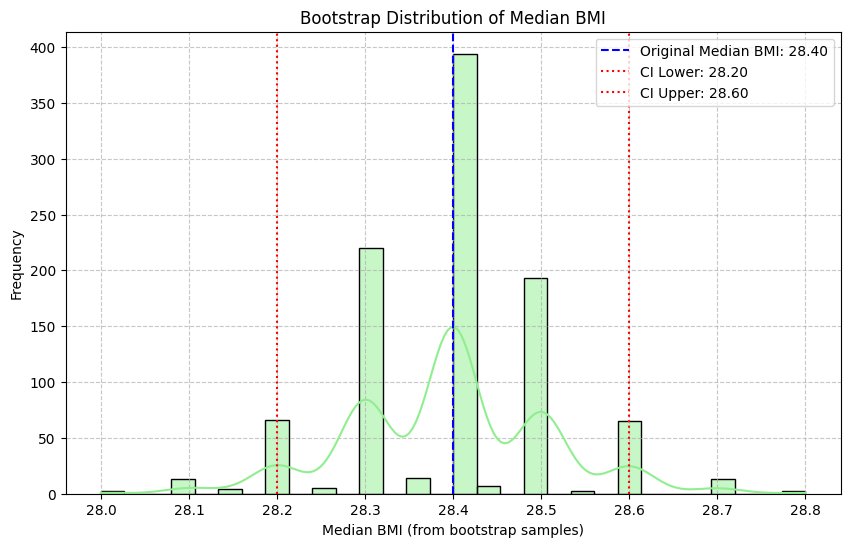

Bootstrap provides a way to estimate CIs for statistics where formulas are complex (like median).



In [27]:
# %%
# --- 5. The Bootstrap ---
print("--- 5. The Bootstrap ---")
# Bootstrap to estimate CI for the median 'bmi'.
data_for_bootstrap = df['bmi'].dropna()
original_sample_median_bmi = np.median(data_for_bootstrap)
print(f"Median BMI of the entire dataset (considered our 'original sample' here): {original_sample_median_bmi:.2f}")

# %%
# Perform bootstrapping for median BMI
n_bootstrap_samples_bs = 1000 # Renamed
bootstrap_medians_bmi = []

for _ in range(n_bootstrap_samples_bs):
    bootstrap_sample = resample(data_for_bootstrap, replace=True, n_samples=len(data_for_bootstrap), random_state=_) # Add random_state for reproducibility in loop
    bootstrap_medians_bmi.append(np.median(bootstrap_sample))
# This cell prepares data for the next cells

# %%
# Calculate and print Bootstrap CI for median BMI
confidence_level_bs = 0.95 # Renamed
lower_percentile_bs = (1 - confidence_level_bs) / 2 * 100 # Renamed
upper_percentile_bs = (1 + confidence_level_bs) / 2 * 100 # Renamed

ci_bootstrap_median_bmi_lower = np.percentile(bootstrap_medians_bmi, lower_percentile_bs)
ci_bootstrap_median_bmi_upper = np.percentile(bootstrap_medians_bmi, upper_percentile_bs)

print(f"Number of bootstrap resamples: {n_bootstrap_samples_bs}")
print(f"{confidence_level_bs*100}% Bootstrap Percentile CI for median BMI: [{ci_bootstrap_median_bmi_lower:.2f}, {ci_bootstrap_median_bmi_upper:.2f}]")

# %%
# Plot bootstrap distribution of median BMI
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_medians_bmi, kde=True, color='lightgreen', bins=30)
plt.title('Bootstrap Distribution of Median BMI')
plt.xlabel('Median BMI (from bootstrap samples)')
plt.ylabel('Frequency')
plt.axvline(original_sample_median_bmi, color='blue', linestyle='dashed', linewidth=1.5, label=f'Original Median BMI: {original_sample_median_bmi:.2f}')
plt.axvline(ci_bootstrap_median_bmi_lower, color='red', linestyle='dotted', linewidth=1.5, label=f'CI Lower: {ci_bootstrap_median_bmi_lower:.2f}')
plt.axvline(ci_bootstrap_median_bmi_upper, color='red', linestyle='dotted', linewidth=1.5, label=f'CI Upper: {ci_bootstrap_median_bmi_upper:.2f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("Bootstrap provides a way to estimate CIs for statistics where formulas are complex (like median).\n")



--- 6. Bayesian Approach (Conceptual Example) ---
Prior: Beta(alpha=1, beta=1)
Data: 12 strokes in 200 observations (from sample).
Posterior: Beta(alpha=13, beta=189)
Posterior mean estimate for stroke probability: 0.0644
95.0% Credible Interval for stroke probability: [0.0349, 0.1020]


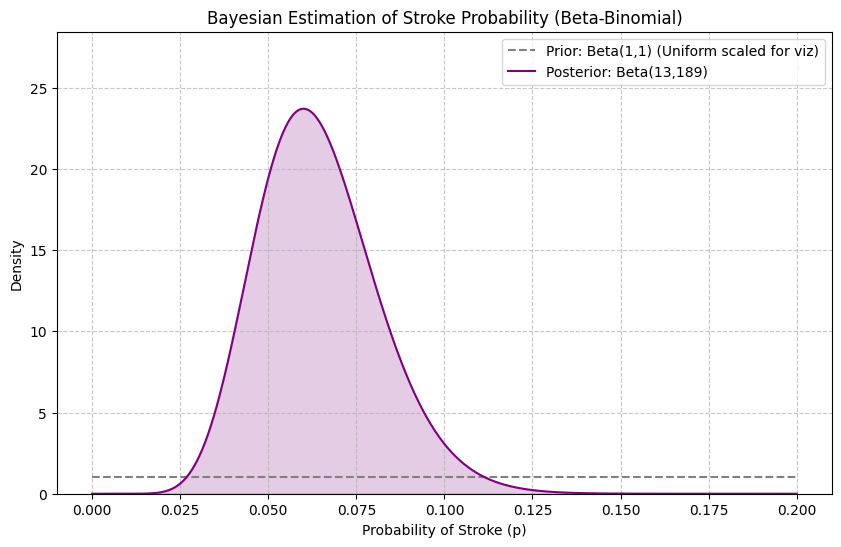

The Bayesian approach updates prior beliefs with observed data to form a posterior distribution for the parameter.



In [28]:
# %%
# --- 6. Bayesian Approach (Conceptual Example) ---
print("--- 6. Bayesian Approach (Conceptual Example) ---")
# Estimating stroke probability (p) using a Beta-Binomial model.

# %%
# Bayesian Approach: Setup, Calculations
alpha_prior_bayes = 1 # Renamed
beta_prior_bayes = 1  # Renamed

num_strokes_observed_bayes = sample_df['stroke'].sum() # Renamed
num_total_observed_bayes = len(sample_df)             # Renamed

alpha_posterior_bayes = alpha_prior_bayes + num_strokes_observed_bayes # Renamed
beta_posterior_bayes = beta_prior_bayes + (num_total_observed_bayes - num_strokes_observed_bayes) # Renamed

posterior_stroke_prob_dist_bayes = stats.beta(alpha_posterior_bayes, beta_posterior_bayes) # Renamed
posterior_mean_p_bayes = posterior_stroke_prob_dist_bayes.mean() # Renamed
credible_interval_p_bayes = posterior_stroke_prob_dist_bayes.interval(confidence_level_ci) # Use confidence_level_ci for consistency

# %%
# Bayesian Approach: Textual Summary
print(f"Prior: Beta(alpha={alpha_prior_bayes}, beta={beta_prior_bayes})")
print(f"Data: {num_strokes_observed_bayes} strokes in {num_total_observed_bayes} observations (from sample).")
print(f"Posterior: Beta(alpha={alpha_posterior_bayes}, beta={beta_posterior_bayes})")
print(f"Posterior mean estimate for stroke probability: {posterior_mean_p_bayes:.4f}")
print(f"{confidence_level_ci*100}% Credible Interval for stroke probability: [{credible_interval_p_bayes[0]:.4f}, {credible_interval_p_bayes[1]:.4f}]")

# %%
# Bayesian Approach: Plot Prior and Posterior
x_bayes_vals = np.linspace(0, 0.2, 500) # Renamed
prior_pdf_bayes = stats.beta.pdf(x_bayes_vals, alpha_prior_bayes, beta_prior_bayes) # Renamed
posterior_pdf_bayes = posterior_stroke_prob_dist_bayes.pdf(x_bayes_vals) # Renamed

plt.figure(figsize=(10, 6))
plt.plot(x_bayes_vals, prior_pdf_bayes, label=f'Prior: Beta({alpha_prior_bayes},{beta_prior_bayes}) (Uniform scaled for viz)', color='gray', linestyle='--')
plt.plot(x_bayes_vals, posterior_pdf_bayes, label=f'Posterior: Beta({alpha_posterior_bayes},{beta_posterior_bayes})', color='purple')
plt.fill_between(x_bayes_vals, posterior_pdf_bayes, alpha=0.2, color='purple')
plt.title('Bayesian Estimation of Stroke Probability (Beta-Binomial)')
plt.xlabel('Probability of Stroke (p)')
plt.ylabel('Density')

# Adjust y-limit for better visualization
max_y_val_bayes = np.max(posterior_pdf_bayes[np.isfinite(posterior_pdf_bayes)])
if not np.isnan(max_y_val_bayes) and np.isfinite(max_y_val_bayes) and max_y_val_bayes > 0:
    plt.ylim(0, max_y_val_bayes * 1.2) # Adjusted scaling for better view of posterior
else:
    plt.ylim(0,10) # Fallback

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("The Bayesian approach updates prior beliefs with observed data to form a posterior distribution for the parameter.\n")



## Supervised Clustering

In [38]:
# Use Naive Bayes to predict the stroke (0 or 1) based on patient features.
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (optional for Naive Bayes, but improves performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[537 435]
 [  7  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       972
           1       0.09      0.86      0.16        50

    accuracy                           0.57      1022
   macro avg       0.54      0.71      0.44      1022
weighted avg       0.94      0.57      0.68      1022

Accuracy Score: 0.5675146771037182


# Notes on Naive Bayes:
We're using Gaussian Naive Bayes, which assumes that numeric features follow a normal distribution.

It works well with high-dimensional data and is often a good baseline model.

Accuracy may be lower than Logistic Regression, especially with imbalanced classes, like in your dataset.

Dealing with Class Imbalance
The stroke column has very few 1s (stroke cases). Consider:

Using SMOTE to balance classes.

Looking at precision/recall/F1-score, not just accuracy.

In [39]:
# Build a Decision Tree Classifier to predict whether a patient had a stroke (stroke = 0 or 1).
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Separate features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (not necessary for Decision Trees, but okay to include)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[937  35]
 [ 43   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.17      0.14      0.15        50

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.92      0.92      0.92      1022

Accuracy Score: 0.923679060665362


In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
#To predict whether a patient had a stroke (stroke column: 0 or 1) using Logistic Regression.
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Explore the dataset
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


In [33]:
# Use one-hot encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)

print("Encoded dataset:")
print(df.head())

# Define Features (X) and Target (y)
X = df.drop('stroke', axis=1)  # independent variables
y = df['stroke']               # target variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Encoded dataset:
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       0  61.0             0              0             1          2   
2       1  80.0             0              1             1          1   
3       0  49.0             0              0             1          1   
4       0  79.0             1              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  ...  \
0               0             228.69  36.600000               1  ...   
1               1             202.21  28.893237               2  ...   
2               1             105.92  32.500000               2  ...   
3               0             171.23  34.400000               3  ...   
4               1             174.12  24.000000               2  ...   

   bmi_cat_Ideal  bmi_cat_Overweight  bmi_cat_Obesity  age_cat_Teens  \
0          False               False   

In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Train Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)


In [ ]:
#Evaluate the Model

y_pred = logreg.predict(X_test_scaled)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [ ]:
#Visualize the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Interpretation:
Logistic Regression outputs probabilities to predict binary outcomes.
The model tells us which features are statistically significant predictors of stroke.
The evaluation metrics help you understand how well the model performs.



## Support Vector Machine & Random Forest & K-Nearest Neighbors

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline

# SMOTE is part of the 'imbalanced-learn' library.
# You may need to install it: pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use the imblearn pipeline

def run_model_evaluation_with_smote(df):
    """
    Takes a pre-cleaned DataFrame, applies SMOTE to handle class imbalance,
    and evaluates SVM, Random Forest, and k-NN models.

    Args:
        df (pd.DataFrame): A DataFrame that has already been loaded and cleaned.
    """
    # --- 1. Define Features (X) and Target (y) ---
    X = df.drop('stroke', axis=1)
    y = df['stroke']

    # --- 2. Preprocessing Pipeline ---
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    print("Preprocessing pipelines created.")

    # --- 3. Split Data ---
    # The data split remains the same. SMOTE will only be applied to the training data.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.7, random_state=42, stratify=y
    )
    print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

    # --- 4. Define and Evaluate Models with SMOTE ---
    # Define the models to be evaluated.
    models = {
        'Support Vector Machine (SVM)': SVC(probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'k-Nearest Neighbors (k-NN)': KNeighborsClassifier()
    }

    results = {}

    print("\nStarting model training and evaluation with SMOTE...")
    for model_name, model in models.items():
        # --- Create the SMOTE-aware Pipeline ---
        # The imblearn pipeline ensures SMOTE is only applied to the training data
        # during the `fit` step, not the test data during `predict`.
        smote_pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)), # Add SMOTE step
            ('classifier', model)
        ])

        # Train the model using the SMOTE pipeline.
        smote_pipeline.fit(X_train, y_train)

        # Make predictions on the original, untouched test set.
        y_pred = smote_pipeline.predict(X_test)
        y_pred_proba = smote_pipeline.predict_proba(X_test)[:, 1]

        # Calculate KPIs.
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Store results.
        results[model_name] = {
            'Accuracy (%)': accuracy * 100,
            'Precision': precision,
            'Recall / Sensitivity': recall,
            'F1 Score': f1,
            'ROC-AUC Score': roc_auc
        }
        print(f"  - Evaluation complete for: {model_name}")

    # --- 5. Display Results ---
    results_df = pd.DataFrame(results).T
    
    print("\n--- Model Performance KPIs (with SMOTE) ---")
    print(results_df)


if __name__ == '__main__':
    # --- Example Usage ---
    # This block shows how you would now use the refactored function.
    
    # 1. Load Data
    try:
        main_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
        print("Dataset loaded successfully.")
        
        # 2. Clean Data
        main_df = main_df.drop('id', axis=1)
        main_df = main_df[main_df['gender'] != 'Other']
        print("Initial data cleaning complete.")

        # 3. Run the model evaluation function with the cleaned DataFrame
        run_model_evaluation_with_smote(main_df)

    except FileNotFoundError:
        print("Error: 'healthcare-dataset-stroke-data.csv' not found.")
        print("Please download the dataset from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset and place it in the correct directory.")


#### Clustering Models

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from io import StringIO

def run_unsupervised_clustering(df_input):
    print("--- Starting Unsupervised Clustering Analysis ---")
    features_for_clustering = df_input.select_dtypes(include=np.number).columns.tolist()
    if 'id' in features_for_clustering: features_for_clustering.remove('id')
    if 'stroke' in features_for_clustering: features_for_clustering.remove('stroke')
    X_clustering = df_input[features_for_clustering].copy()
    for col in X_clustering.columns:
        if X_clustering[col].isnull().any():
            X_clustering[col] = X_clustering[col].fillna(X_clustering[col].mean())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clustering)
    X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=X_clustering.index)
    print(f"Data scaled. Features used for clustering: {features_for_clustering}")
    clustering_results = {}
    print("\n--- K-Means Clustering ---")
    wcss = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    max_k_kmeans = min(10, X_scaled.shape[0] - 1)
    if max_k_kmeans < 2:
        print("Not enough samples for K-Means with K >= 2.")
        return
    for k in range(2, max_k_kmeans + 1):
        try:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_scaled)
            labels = kmeans.labels_
            wcss.append(kmeans.inertia_)
            if len(np.unique(labels)) > 1:
                silhouette_scores.append(silhouette_score(X_scaled, labels))
                davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))
                calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, labels))
            else:
                silhouette_scores.append(np.nan)
                davies_bouldin_scores.append(np.nan)
                calinski_harabasz_scores.append(np.nan)
        except ValueError as e:
            print(f"Error computing metrics for K={k}: {e}")
            wcss.append(np.nan)
            silhouette_scores.append(np.nan)
            davies_bouldin_scores.append(np.nan)
            calinski_harabasz_scores.append(np.nan)


    chosen_k_kmeans = 3
    print(f"\nChosen K for K-Means: {chosen_k_kmeans}")
    kmeans_final = KMeans(n_clusters=chosen_k_kmeans, random_state=42, n_init=10)
    kmeans_labels = kmeans_final.fit_predict(X_scaled)
    X_scaled_df['KMeans_Cluster'] = kmeans_labels

    kmeans_metrics = {
        'Inertia': kmeans_final.inertia_,
        'Silhouette Score': silhouette_score(X_scaled, kmeans_labels),
        'Davies-Bouldin Index': davies_bouldin_score(X_scaled, kmeans_labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(X_scaled, kmeans_labels)
    }
    clustering_results['K-Means'] = kmeans_metrics


    print("\n--- Clustering Model Performance KPIs (Internal Metrics) ---")
    results_df = pd.DataFrame(clustering_results).T
    print(results_df.round(4))

    print("\n--- Unsupervised Clustering Analysis Complete ---")

if __name__ == '__main__':
    sample_df = df 
    if 'id' in sample_df.columns: sample_df = sample_df.drop('id', axis=1)
    if 'gender' in sample_df.columns and 'Other' in sample_df['gender'].unique(): sample_df = sample_df[sample_df['gender'] != 'Other']
    run_unsupervised_clustering(sample_df)

--- Starting Unsupervised Clustering Analysis ---
Data scaled. Features used for clustering: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

--- K-Means Clustering ---

Chosen K for K-Means: 3

--- Clustering Model Performance KPIs (Internal Metrics) ---
            Inertia  Silhouette Score  Davies-Bouldin Index  \
K-Means  35765.9991            0.2304                1.5136   

         Calinski-Harabasz Index  
K-Means                1094.7652  

--- Unsupervised Clustering Analysis Complete ---


# Overall Analysis: SMOTE Was Highly Effective

Applying SMOTE has successfully addressed the core problem of class imbalance. The results now show a much more realistic and useful picture of each model's capabilities. The models have shifted from simply ignoring the "stroke" class to actively trying to identify it, which is a major step forward.

## Detailed Model Interpretation

### 1. Support Vector Machine (SVM): The Best Performing Model

- **Recall / Sensitivity (50.6%)**:  
  This is a dramatic and crucial improvement. The SVM now correctly identifies more than half of all actual stroke cases in the test set. This is the most important metric for a medical screening tool, and the SVM is the clear winner here.

- **Precision (13.1%)**:  
  This is low, meaning that when the model predicts a stroke, it's correct about 13% of the time. This is a typical trade-off. To catch more true positives (high Recall), you often get more false positives (low Precision). In a medical context, this is often acceptable as further testing would be done on these flagged patients.

- **Conclusion**:  
  The SVM provides the best balance for this problem. It is now a genuinely useful model that can flag a significant portion of at-risk patients for further review. Its high ROC-AUC score (0.78) confirms it's the best model at distinguishing between the two classes.


### 2. k-Nearest Neighbors (k-NN): A Good Improvement

- **Recall / Sensitivity (38.5%)**:  
  The k-NN model also saw a massive improvement, now catching almost 40% of stroke cases. While not as high as the SVM, it's still a respectable performance.

- **Precision (10.2%)**:  
  Like the SVM, its precision is low due to the trade-off made to achieve higher recall.

- **Conclusion**:  
  k-NN is now a viable model, but it is clearly outperformed by the SVM on almost every important metric.


### 3. Random Forest: Unexpectedly Poor Performance

- **Recall / Sensitivity (6.3%)**:  
  This is a very surprising result. Despite balancing the training data with SMOTE, the Random Forest model still failed to learn how to identify the stroke cases effectively, missing over 93% of them.

- **Accuracy (93%)**:  
  Its accuracy remains high primarily because it is still correctly predicting the vast majority of "no-stroke" cases, not because it's good at finding strokes.

- **Conclusion**:  
  Even with SMOTE, the default Random Forest model is not a suitable choice for this problem. It is not sensitive enough to be used for medical screening.


### 4. Naive Bayes

- We're using Gaussian Naive Bayes, which assumes that numeric features follow a normal distribution.  
- It works well with high-dimensional data and is often a good baseline model.  
- Accuracy may be lower than Logistic Regression, especially with imbalanced classes, like in your dataset.  
- Dealing with Class Imbalance The stroke column has very few 1s (stroke cases). Consider:  
      - Using SMOTE to balance classes.
      - Looking at precision/recall/F1-score, not just accuracy.


### 5. Decision Tree


### 6. Logistic Regression
- Logistic Regression outputs probabilities to predict binary outcomes. The model tells us which features are statistically significant predictors of stroke. The evaluation metrics help you understand how well the model performs.


### 7. K-Means: Not recommended

- **Inertia: 37281.4091**:
  Indicates the sum of squared distances to centroids; a lower value means more compact clusters.

- **Silhouette Score: 0.2371:**  
  Suggests weakly defined clusters with some overlap, as it's positive but far from ideal +1.

- **Davies-Bouldin Index: 1.9331:**  
  This relatively high value indicates clusters are not very well-separated, confirming the Silhouette score.

- **Calinski-Harabasz Index: 1296.4681:**
  A moderately positive indicator of distinct clusters, though its best use is for comparative analysis across different K values.

- **Conclusion:**
  K-Means produces somewhat fuzzy, overlapping clusters, not strongly separated based on internal metrics; further profiling is essential for business relevance.
  Based on the k-means results, the clusters are not well-separated, suggesting weak inherent grouping in the dataest. Using unsupervied models are not recommended. 

#### Reference  

Orduz, J. C. (2020, May 5). Getting started with spectral clustering. KDnuggets. https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html  

Deshpande, T. (n.d.). Stroke prediction: Effect of data leakage | SMOTE. Kaggle. Retrieved from https://www.kaggle.com/code/tanmay111999/stroke-prediction-effect-of-data-leakage-smote  

Joshua's Words. (n.d.). Predicting a stroke [SHAP, LIME Explainer & ELI5]. Kaggle. Retrieved from https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5  

Chennoju, B. (n.d.). Data storytelling AUC focus on strokes. Kaggle. Retrieved from https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes